In [1]:
# Imports and dependencies

import requests
import json
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

original = "https://i.imgur.com/M2IbhhY.jpg"
adversary = "https://i.imgur.com/K14loOT.jpg"

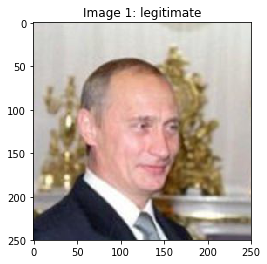

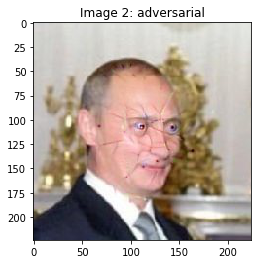

In [2]:
# Display images

def display_image(img,title):
    response = requests.get(img)
    img = Image.open(BytesIO(response.content))
    img_arr = np.array(img)
    plt.imshow(img_arr)
    plt.title(title)
    plt.show() 

display_image(original,'Image 1: legitimate')
display_image(adversary,'Image 2: adversarial')

In [3]:
# Test images against publicly accessible facial recognition API

def detect_celebrity(image):
    ## SightEngine Facial recognition API endpoint URL and headers
    data = [
        ('models', 'celebrities'),
        ('api_user', '209085908'),
        ('api_secret', 'q5NWgTPVHPZvPfsFqr6F'),
        ('url', image),
    ]
    try:
        response = requests.post(
            'https://api.sightengine.com/1.0/check.json', data=data)
        client_res = response.json()
        return str(client_res['faces'][0]['celebrity'][0])
    except:
        return 'error'

print('\nCalling SightEngine Facial Identification API')
res_ori = detect_celebrity(original)
res_adv = detect_celebrity(adversary)

print('\nImage 1: ' + res_ori + '        Image 2: ' + res_adv)


Calling SightEngine Facial Identification API

Image 1: {'name': 'Vladimir Putin', 'prob': 0.92}        Image 2: {'name': 'Jacques Dynam', 'prob': 0.75}


In [4]:
# Test images against Inscribe's adversarial example detection API

def detect_adversary(image):
    ## Adversarial detection API endpoint URL and headers
    inscribe_url = "https://ii8vculmmi.execute-api.us-west-2.amazonaws.com/dev/v1"
    inscribe_headers = {
        'Content-Type': 'application/json',
        'x-api-key': 'ncAbKBsoIi6OHK3Kv8dlc2VKcIsyMdge6nRcbyBP'
    }
    data = {
        'image': image,
        'origin_filename': "",
        'origin_id': "",
        'origin_ip': "",
        'origin_dtime': "",
        'origin_location': ""
    }
    try:
        r = requests.post(
        inscribe_url, headers=inscribe_headers, data=json.dumps(data))
        inscribe_res = r.json()
        return str(inscribe_res)
    except:
        return 'error'

print('\nCalling Inscribe Adversarial Detection API')
res_ori = detect_adversary(original)
res_adv = detect_adversary(adversary)

print('\nImage 1: ' + res_ori + '        Image 2: ' + res_adv)


Calling Inscribe Adversarial Detection API

Image 1: {'result': 'Legitimate', 'score': '0.0'}        Image 2: {'result': 'Adversary', 'score': '1.0'}
